In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [16]:
data = pd.read_csv("fitting.txt",delimiter=" ",skiprows=1,header=None,names=['x','y','y_err'])

data = data.sample(frac=1)

trainning_data = data.head(10)
test_data = data.tail(10)

<Container object of 3 artists>

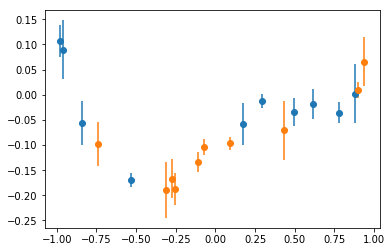

In [17]:
xtr = np.array(trainning_data['x'])
ytr = np.array(trainning_data['y'])
etr = np.array(trainning_data['y_err'])

xte = np.array(test_data['x'])
yte = np.array(test_data['y'])
ete = np.array(test_data['y_err'])

plt.errorbar(xtr,ytr,etr,fmt = "o")
plt.errorbar(xte,yte,ete,fmt = "o")

In [18]:
def model(x,params):
    return np.poly1d(params)(x)

In [19]:
def loglikelihood(x_obs, y_obs, sigma_y_obs,params):
    d = y_obs -  model(x_obs, params)
    d = d/sigma_y_obs
    d = -0.5 * np.sum(d**2)
    return d

def logprior(params):
    
    n_dims = len(params)
    p = -np.inf
    
    if (params > -1).all() and (params < 1).all():
        p = -n_dims*np.log(2)
    return p


In [20]:
def MCMC(n_params,N=5000):
    print("# params: {}".format(n_params))
#     N = 50000
    lista_params=[np.random.uniform(-1,1,n_params)]
#     print(lista_params)
    # logposterior = [loglikelihood(x_obs, y_obs, lista_m[0], lista_b[0]) + logprior(lista_m[0], lista_b[0])]
    logposterior = [0]

    # sigma_deltas = [0.01]*n_params
    sigma_delta = 0.05


    for i in range(1,N):

        propuestas = lista_params[i-1] + np.random.normal(0,1,n_params)*sigma_delta

        logposterior_viejo = loglikelihood(xtr, ytr, etr, lista_params[i-1]) + logprior(lista_params[i-1])
        logposterior_nuevo = loglikelihood(xtr, ytr, etr,  propuestas ) + logprior(propuestas)

        r = min(1,np.exp(logposterior_nuevo-logposterior_viejo))
        alpha = np.random.random()
        if(alpha<r):
            lista_params.append(propuestas)
    #         lista_m.append(propuesta_m)
    #         lista_b.append(propuesta_b)
            logposterior.append(logposterior_nuevo)
        else:
            lista_params.append(lista_params[i-1])
    #         lista_m.append(lista_m[i-1])
    #         lista_b.append(lista_b[i-1])
            logposterior.append(logposterior_viejo)
    lista_params = np.array(lista_params)
    # lista_m = np.array(lista_m)
    # lista_b = np.array(lista_b)
    logposterior = np.array(logposterior)
    return lista_params

In [21]:
# lista_params = MCMC(3)
# print(lista_params)

In [22]:
# plt.hist(lista_params[:,0],bins=30)

In [23]:
estimates = [np.mean(lista_params[:,i]) for i in range(lista_params.shape[1])]

In [10]:
xs = np.linspace(min(xtr),max(xtr),100)
# plt.plot(xs,np.poly1d(estimates)(xs))
# plt.errorbar(xtr,ytr,etr,fmt = "o")
# plt.errorbar(xte,yte,ete,fmt = "o",alpha=0.2)

# params: 1
# params: 2
# params: 3


/home/mauro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in exp


# params: 4
# params: 5
# params: 6
# params: 7
# params: 8
# params: 9
# params: 10


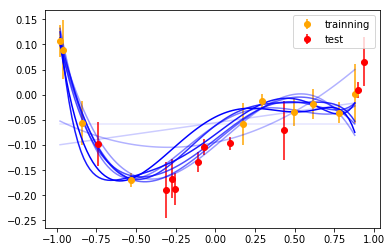

In [28]:
fitted_params = []
xs = np.linspace(min(xtr),max(xtr),100)
for i in range(1,11):
    lista_params = MCMC(i)
    estimates = [np.mean(lista_params[:,i]) for i in range(lista_params.shape[1])]
    fitted_params.append(estimates)
    plt.plot(xs,np.poly1d(estimates)(xs),c='blue',alpha= 0.002 + 0.998*i/10)
plt.errorbar(xtr,ytr,etr,fmt = "o",label = 'trainning',c = 'orange')
plt.errorbar(xte,yte,ete,fmt = "o",label ='test',c='red')
plt.legend()

In [29]:
xst = np.linspace(1,10,10)
def MSE(x,y,e,params):
    return 1/10 * sum((y-model(x,params))**2/e**2)

In [30]:
yote = []
yotr = []
for xi in range(int(max(xst))):
    yote.append(MSE(xte,yte,ete,fitted_params[xi-1]))
    yotr.append(MSE(xtr,ytr,etr,fitted_params[xi-1]))

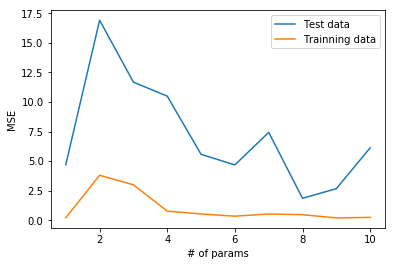

In [14]:
plt.plot(xst,yote,label='Test data')
plt.plot(xst,yotr,label = 'Trainning data')
plt.legend()
plt.xlabel("# of params")
plt.ylabel("MSE")
plt.savefig("MSEs.pdf")

In [ ]:
yote